<a href="https://colab.research.google.com/github/nguyenvananhit/Credit-Card-Transactions-Fraud-Detection-with-SVM/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Phân tích dự đoán thẻ giả mạo trong giao dịch bằng mô hình SVM **

In [5]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

1. **import datetime**:
 Import thư viện datetime, giúp làm việc với ngày và giờ. Sử dụng datetime để thao tác với ngày giờ, tính toán thời gian, hoặc chuyển đổi dữ liệu thời gian trong các dự án phân tích dữ liệu.
2. **import numpy as np**:
 Import thư viện numpy và gán tên viết tắt  là np.
Numpy cung cấp các công cụ cho tính toán số học hiệu quả, làm việc với mảng và ma trận. Đây là thư viện cơ bản cho các phép toán số học trong Python.
3. **import pandas as pd**:
Import thư viện pandas và gán tên viết tắ là pd.
Pandas là thư viện chính để thao tác với dữ liệu dạng bảng. Nó cung cấp các cấu trúc dữ liệu như DataFrame và Series, rất hữu ích cho việc xử lý, phân tích và quản lý dữ liệu.
4. **import matplotlib.pyplot as plt**:
Import lớp  pyplot của thư viện matplotlib và gán tên viết tắ là plt.
Matplotlib là thư viện vẽ đồ thị trong Python. pyplot cung cấp các hàm để tạo các biểu đồ và đồ thị để trực quan hóa dữ liệu.
5. **import seaborn as sns**:
Import thư viện seaborn và gán tên viết tắ là sns.
Seaborn là một thư viện vẽ đồ thị nâng cao, dựa trên matplotlib, cung cấp các biểu đồ và giao diện trực quan hơn cho phân tích dữ liệu. Nó thường được sử dụng để tạo các đồ thị thống kê và nâng cao khả năng trực quan hóa dữ liệu.
6.  **from sklearn.model_selection import train_test_split**:
Mục đích: Import hàm train_test_split từ sklearn.model_selection.
Sử dụng: Hàm train_test_split được sử dụng để chia dữ liệu thành các tập huấn luyện và kiểm tra, giúp đánh giá mô hình học máy.
7. **from sklearn.svm import SVC**:
Import lớp SVC (Support Vector Classification) từ thư viện sklearn.svm.
 SVC là một loại mô hình học máy dùng để phân loại. Nó cố gắng tìm mặt phẳng phân chia tối ưu giữa các lớp trong không gian dữ liệu.
8. **from sklearn.metrics import accuracy_score**:
 Import hàm accuracy_score từ thư viện sklearn.metrics.
 Hàm accuracy_score được dùng để tính toán độ chính xác của mô hình phân loại, tức là tỷ lệ dự đoán đúng trên tổng số dự đoán.
9. **from sklearn.preprocessing import LabelEncoder**:
 Import lớp LabelEncoder từ thư viện sklearn.preprocessing.
 LabelEncoder được sử dụng để mã hóa các giá trị phân loại (như chuỗi ký tự) thành các số nguyên, giúp mô hình học máy có thể xử lý dữ liệu phân loại.

In [6]:
train_data = pd.read_csv("fraudTrain.csv")

Mục đích: Đọc dữ liệu từ một file CSV và lưu vào một DataFrame của pandas.

pd.read_csv(): Đây là một hàm của thư viện pandas, dùng để đọc dữ liệu từ file CSV và chuyển nó thành một DataFrame.
"fraudTrain.csv": Đây là tên của file CSV chứa dữ liệu muốn đọc. File này phải có định dạng CSV và nằm trong thư mục làm việc hiện tại hoặc cần cung cấp đường dẫn đầy đủ đến file.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

Khi  chạy train_data.info(),  sẽ nhận được thông tin về DataFrame train_data

In [8]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


Lệnh train_data.describe() trong pandas được sử dụng để tạo ra một bảng thống kê mô tả cho các cột dữ liệu số trong DataFrame. Đây là cách để có thể hiểu rõ hơn về phân phối và các đặc điểm cơ bản của dữ liệu số trong DataFrame.

In [9]:
train_data.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


Lệnh `train_data.dtypes` trong pandas được sử dụng để kiểm tra kiểu dữ liệu của từng cột trong DataFrame train_data. Nó trả về một Series, trong đó chỉ số là tên các cột và giá trị là kiểu dữ liệu của các cột đó.

In [10]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Lệnh `train_data.columns` trong pandas được sử dụng để liệt kê tất cả các tên cột trong DataFrame train_data. Nó trả về một Index object chứa các tên cột của DataFrame.

In [11]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"] = pd.to_datetime(train_data["dob"])
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


Đoạn mã  chuyển đổi hai cột trong DataFrame train_data từ định dạng chuỗi ký tự (string) thành định dạng ngày giờ (datetime).

In [12]:
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


Đoạn mã loại bỏ một số cột không cần thiết khỏi DataFrame train_data bằng cách sử dụng phương thức drop.

In [ ]:

train_data.dropna(ignore_index=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


Lệnh `train_data.dropna(ignore_index=True)` trong pandas được sử dụng để loại bỏ các hàng có giá trị thiếu (NaN) khỏi DataFrame train_data.

In [13]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

Đoạn mã  sử dụng `LabelEncoder` từ thư viện sklearn để mã hóa các biến phân loại trong DataFrame train_data. Đây là một bước quan trọng trong việc tiền xử lý dữ liệu, chuẩn bị dữ liệu cho các mô hình học máy.

In [14]:
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,1,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765,0
1296671,2,1,51.70,1,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528,0
1296672,599,1,105.93,1,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529,0
1296673,509,1,74.90,1,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160,0


In ra DataFrame train_data

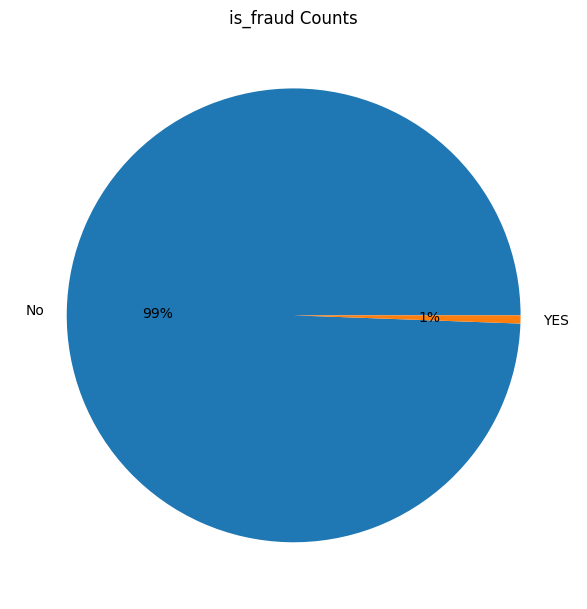

In [15]:
exit_counts = train_data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Đoạn mã tạo ra một biểu đồ hình tròn  để trực quan hóa tỷ lệ phân phối của biến phân loại is_fraud trong DataFrame train_data. Biểu đồ này giúp hiểu sự phân bố của các lớp trong dữ liệu, cụ thể là tỷ lệ của các giao dịch có và không có gian lận.



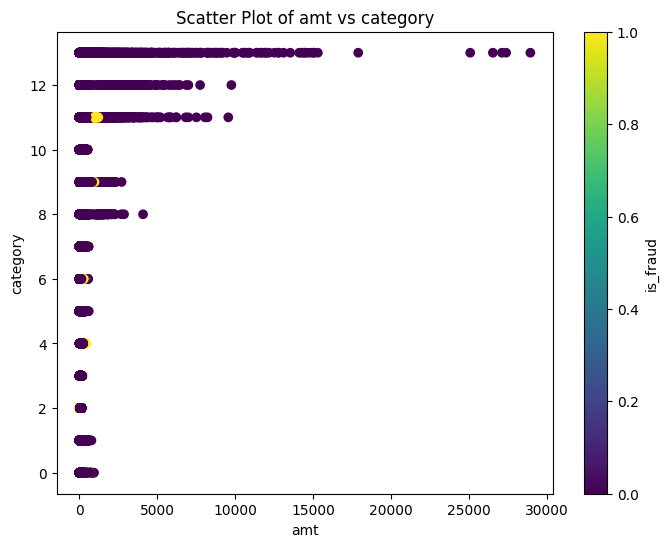

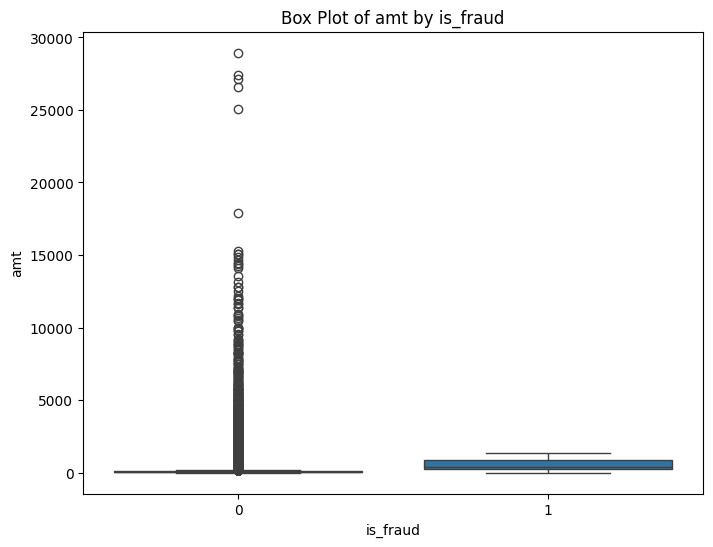

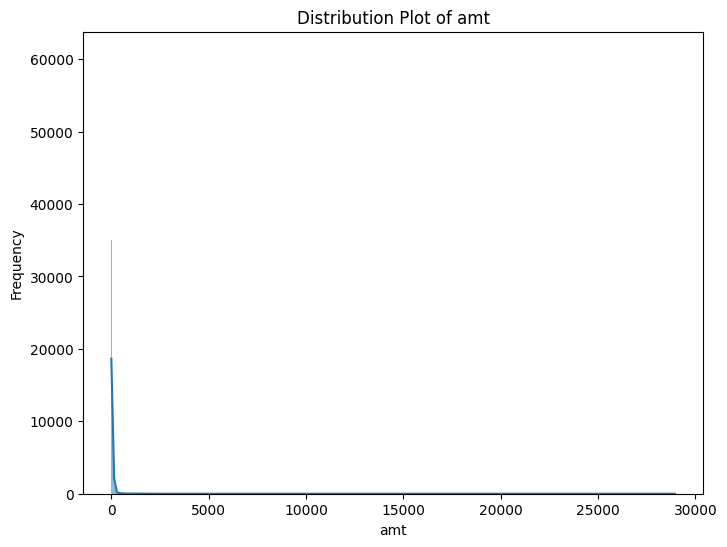

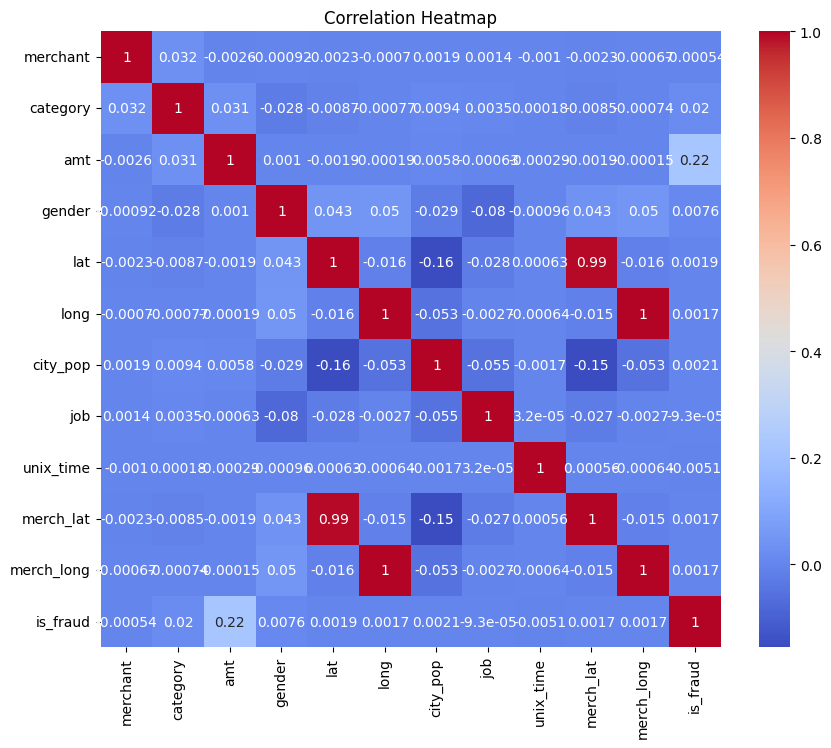

In [17]:


import matplotlib.pyplot as plt
# Biểu đồ phân tán (Scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(train_data['amt'], train_data['category'], c=train_data['is_fraud'], cmap='viridis')
plt.xlabel('amt')
plt.ylabel('category')
plt.title('Scatter Plot of amt vs category')
plt.colorbar(label='is_fraud')
plt.show()

# Biểu đồ hộp (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='amt', data=train_data)
plt.xlabel('is_fraud')
plt.ylabel('amt')
plt.title('Box Plot of amt by is_fraud')
plt.show()

# Biểu đồ phân phối (Distribution plot)
plt.figure(figsize=(8, 6))
sns.histplot(train_data['amt'], kde=True)
plt.xlabel('amt')
plt.ylabel('Frequency')
plt.title('Distribution Plot of amt')
plt.show()

# Biểu đồ nhiệt (Heatmap)
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


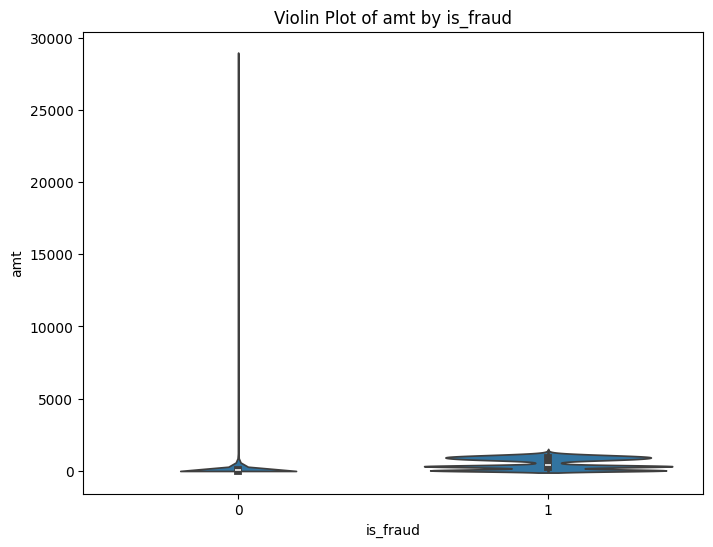

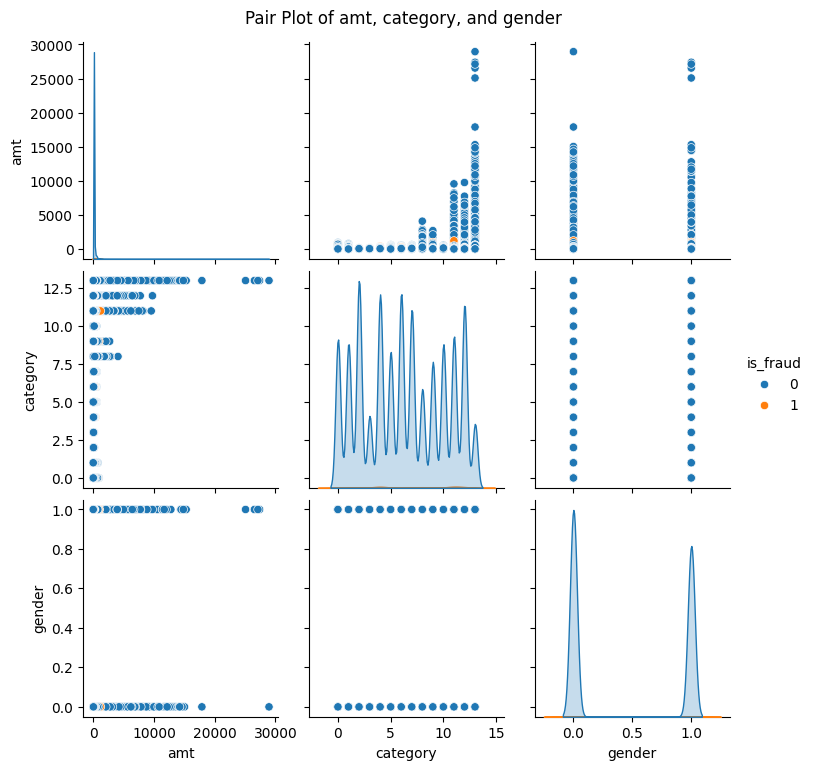

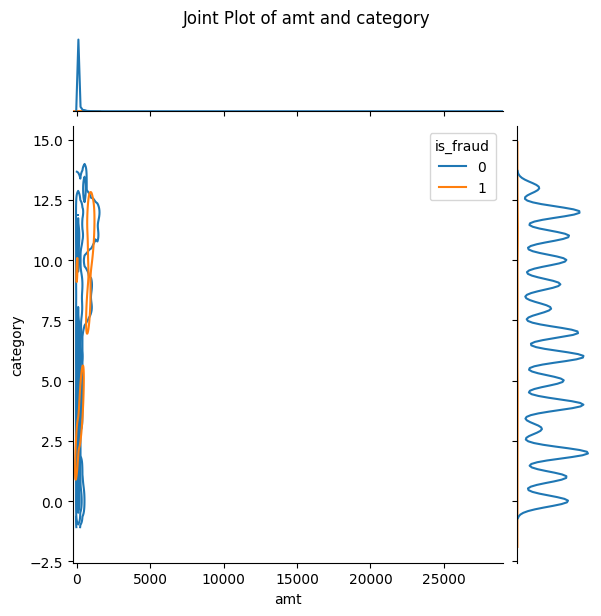

In [ ]:
# prompt: Thêm một số loại biểu đồ cần thiết
import matplotlib.pyplot as plt
# Biểu đồ violin
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_fraud', y='amt', data=train_data)
plt.xlabel('is_fraud')
plt.ylabel('amt')
plt.title('Violin Plot of amt by is_fraud')
plt.show()

# Biểu đồ cặp (Pair plot)
sns.pairplot(train_data, hue='is_fraud', vars=['amt', 'category', 'gender'])
plt.suptitle('Pair Plot of amt, category, and gender', y=1.02)
plt.show()

# Biểu đồ jointplot
sns.jointplot(x='amt', y='category', data=train_data, kind='kde', hue='is_fraud')
plt.suptitle('Joint Plot of amt and category', y=1.02)
plt.show()


In [18]:
X = train_data.drop(columns=["is_fraud"], inplace = False)
Y = train_data["is_fraud"]

Dùng để tách dữ liệu thành hai phần: X (dữ liệu đầu vào) và Y (nhãn mục tiêu). Đây là bước chuẩn bị dữ liệu quan trọng trước khi xây dựng mô hình học máy.

In [19]:
model = SVC()
model.fit(X, Y)

SVC()

Dòng mã  dùng để khởi tạo và huấn luyện một mô hình SVM (Support Vector Machine) để phân loại dữ liệu.

In [20]:
model.score(X, Y)

0.9942113482561166

Phương thức `model.score(X, Y)` được sử dụng để đánh giá hiệu suất của mô hình đã được huấn luyện bằng cách tính toán điểm số chính xác (accuracy) trên tập dữ liệu đầu vào X và nhãn mục tiêu Y.

In [ ]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, Y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new model with the best parameters
best_model = SVC(**best_params)
best_model.fit(X, Y)

# Evaluate the best model
best_model_score = best_model.score(X, Y)

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Best Model Score on Training Data:", best_model_score)


# **Tiến hành Test Model**

In [ ]:
test_data1 = pd.read_csv("fraudTest.csv")
test_data1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,4/4/1999,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,1
3,3,6/21/2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,3.19,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,N,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,12/31/2020 23:59,3.060000e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,2/13/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,12/31/2020 23:59,3.560000e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,12/27/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,12/31/2020 23:59,6.010000e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,11/29/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,12/31/2020 23:59,4.080000e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,12/15/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


Đoạn mã  đọc dữ liệu từ tập tin CSV ` fraudTest.csv` vào một DataFrame test_data. Để kiểm tra mô hình SVM đã huấn luyện

In [ ]:
test_data1.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data1

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,1
3,fraud_Haley Group,misc_pos,3.19,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,N,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


Loại bỏ các cột không cần thiết: Xóa các cột được chỉ định từ DataFrame test_data. Tham số inplace=True cho phép thay đổi trực tiếp DataFrame mà không tạo ra một bản sao mới.

In [ ]:
test_data_clean = test_data1.dropna()

In [ ]:
test_data_clean

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,1
3,fraud_Haley Group,misc_pos,3.19,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,N,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [ ]:
encoder = LabelEncoder()
test_data_clean["merchant"] = encoder.fit_transform(test_data_clean["merchant"])
test_data_clean["category"] = encoder.fit_transform(test_data_clean["category"])
test_data_clean["gender"] = encoder.fit_transform(test_data_clean["gender"])
test_data_clean["job"] = encoder.fit_transform(test_data_clean["job"])

In [ ]:
X_test = test_data_clean.drop(columns=["is_fraud"], inplace = False)
Y_test = test_data_clean["is_fraud"]

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(test_data1['is_fraud'],y_pred)
accuracy

0.9961347371603274